In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [2]:
params_dic = {}
for response in ['workplaces', 'residential', 'grocery_pharmacy', 'retail', 'parks','transit' ]:
    params_dic[response] = {}

## Load France parameters and mobility_heat

In [ ]:
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

#load model parameters from R2Mlwin
df = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/regression/s.csv")
df.columns = ['variable', 'estimate']

#load data set used for modelling
mob_vars = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/france/THI_mobility_heat_w_vars_90_4SD_precip_Global2.csv")



#### format variables for every year (as opposed to categorical), format binary variable for duration and coast

### make subset dataframe for every activity-type variable

In [4]:
df['workplaces'] = [1 if 'workplaces' in x else 0 for x in df['variable'] ]
df['residential'] = [1 if 'residential' in x else 0 for x in df['variable'] ]
df['parks'] = [1 if 'parks' in x else 0 for x in df['variable'] ]
df['grocery_pharmacy'] = [1 if 'grocery_pharmacy' in x else 0 for x in df['variable'] ]
df['retail'] = [1 if 'retail' in x else 0 for x in df['variable'] ]


In [5]:
residential = df[df['residential'] == 1].reset_index()
workplaces = df[df['workplaces'] == 1].reset_index()
grocery_pharmacy = df[df['grocery_pharmacy'] == 1].reset_index()
parks = df[df['parks'] == 1].reset_index()
retail = df[df['retail'] == 1].reset_index()


### Format params into dataframe

In [6]:
df['variable'].unique()

array(['FP_Intercept_residential_difference',
       'FP_Intercept_workplaces_difference',
       'FP_Intercept_grocery_pharmacy_difference',
       'FP_Intercept_retail_difference', 'FP_Intercept_parks_difference',
       'FP_thi_centered_residential_difference',
       'FP_thi_centered_workplaces_difference',
       'FP_thi_centered_grocery_pharmacy_difference',
       'FP_thi_centered_retail_difference',
       'FP_thi_centered_parks_difference',
       'FP_thi_diff_residential_difference',
       'FP_thi_diff_workplaces_difference',
       'FP_thi_diff_grocery_pharmacy_difference',
       'FP_thi_diff_retail_difference', 'FP_thi_diff_parks_difference',
       'FP_rain_standard_heat_residential_difference',
       'FP_rain_standard_heat_workplaces_difference',
       'FP_rain_standard_heat_grocery_pharmacy_difference',
       'FP_rain_standard_heat_retail_difference',
       'FP_rain_standard_heat_parks_difference',
       'FP_rain_standard_control_residential_difference',
       'F

In [7]:
residential

,index,variable,estimate,workplaces,residential,parks,grocery_pharmacy,retail
0,0,FP_Intercept_residential_difference,0.777826,0,1,0,0,0
1,5,FP_thi_centered_residential_difference,0.242517,0,1,0,0,0
2,10,FP_thi_diff_residential_difference,0.139889,0,1,0,0,0
3,15,FP_rain_standard_heat_residential_difference,-0.009039,0,1,0,0,0
4,20,FP_rain_standard_control_residential_difference,-0.019733,0,1,0,0,0
5,25,FP_heatwave_durTrue_residential_difference,0.659242,0,1,0,0,0
6,30,FP_stage_frac_residential_difference,2.793006,0,1,0,0,0
7,35,FP_weekend1_residential_difference,-2.402874,0,1,0,0,0
8,40,FP_popden_dec_residential_difference,0.065687,0,1,0,0,0
9,45,FP_HDI_dec_residential_difference,-0.044596,0,1,0,0,0


In [8]:
dic = {}
for response in ['workplaces', 'residential', 'parks', 'retail', 'grocery_pharmacy']:
    
    dic[response] = {}
    subset = df[df[response]==1].reset_index()
    dic[response]['global_intercept'] = subset.iloc[0, 2]
    dic[response]['thi_heat_centered'] = subset.iloc[1,2]
    dic[response]['temp_diff'] = subset.iloc[2,2]
    dic[response]['rain_normed_heat'] = subset.iloc[3,2]
    dic[response]['rain_normed_control'] = subset.iloc[4,2]
    dic[response]['heatwave_dur'] = subset.iloc[5,2]
    dic[response]['stage_frac'] = subset.iloc[6,2]
    dic[response]['weekend'] = subset.iloc[7,2]
    dic[response]['popdens_dec'] = subset.iloc[8,2]
    dic[response]['HDI_dec'] = subset.iloc[9,2]
    dic[response]['over60_dec'] = subset.iloc[10,2]
    dic[response]['coast'] = subset.iloc[11,2]
    dic[response]['elev_1500'] = subset.iloc[12,2]




In [9]:
def get_average_effects(dic, response, state):
    
    
    estimate_subset = dic[response]
    
    global_int = estimate_subset['global_intercept']
    
    #get each state's unique subset (average covariates are unique to each state)
    mob_vars_subset = mob_vars


    
    
    variable_sum = sum([estimate_subset['temp_diff']*mob_vars_subset['temp_diff'].mean(), 
                  estimate_subset['stage_frac']*mob_vars_subset['stage_frac'].mean(), 
                  estimate_subset['weekend']*mob_vars_subset['weekend'].mean(), 
                  estimate_subset['heatwave_dur']*mob_vars_subset.groupby('heat_ID')['heatwave_dur'].mean().mean(), 
                  estimate_subset['coast']*mob_vars_subset.groupby('location')['coast'].mean().mean(),
                  estimate_subset['popdens_dec']*mob_vars_subset.groupby('location')['popdens_de'].mean().mean(), 
                  estimate_subset['over60_dec']*mob_vars_subset.groupby('location')['over60_dec'].mean().mean(),
                  estimate_subset['HDI_dec']*mob_vars_subset.groupby('location')['HDI_dec'].mean().mean(), 
                  estimate_subset['elev_1500']*mob_vars_subset.groupby('location')['elev_1500m'].mean().mean()])
        

    


    slope = estimate_subset[f'thi_heat_centered']
    final_average = global_int + variable_sum 
    
    params_dic = {}
        
    return [slope, final_average]





## Iterate through repsonses and states, create dictionary with intercepts and slopes

In [10]:
state = 'France'
for response in ['workplaces', 'residential', 'retail', 'parks', 'grocery_pharmacy']:
    params_dic[response][state] = get_average_effects(dic, response, state)

params_dic['transit'][state] = [0, 0]


In [11]:
params_dic

{'workplaces': {'France': [np.float64(0.0066019731285934),
   np.float64(-12.475089930956566)]},
 'residential': {'France': [np.float64(0.242516535709981),
   np.float64(3.0749871027445286)]},
 'grocery_pharmacy': {'France': [np.float64(-0.722436064005295),
   np.float64(-3.57105058040883)]},
 'retail': {'France': [np.float64(-1.0841153470102),
   np.float64(-4.016340540865491)]},
 'parks': {'France': [np.float64(-3.50649314035037),
   np.float64(37.15215059500765)]},
 'transit': {'France': [0, 0]}}

## Load Brazil parameters and mobility_heat

In [13]:
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

#load model parameters from R2Mlwin
df = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/regression/thi_brazil_params_4SD_precip_g2.csv")
df.columns = ['variable', 'estimate']

#load data set used for modelling
mob_vars = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/brazil/THI_mobility_heat_w_vars_90_4SD_precip_Global2.csv")



### make subset dataframe for every activity-type variable

In [14]:
df['workplaces'] = [1 if 'workplaces' in x else 0 for x in df['variable'] ]
df['residential'] = [1 if 'residential' in x else 0 for x in df['variable'] ]
df['parks'] = [1 if 'parks' in x else 0 for x in df['variable'] ]
df['grocery_pharmacy'] = [1 if 'grocery_pharmacy' in x else 0 for x in df['variable'] ]
df['retail'] = [1 if 'retail' in x else 0 for x in df['variable'] ]
df['transit'] = [1 if 'transit' in x else 0 for x in df['variable'] ]

In [15]:
residential = df[df['residential'] == 1].reset_index()
workplaces = df[df['workplaces'] == 1].reset_index()
grocery_pharmacy = df[df['grocery_pharmacy'] == 1].reset_index()
parks = df[df['parks'] == 1].reset_index()
retail = df[df['retail'] == 1].reset_index()
transit = df[df['transit'] == 1].reset_index()

### Format params into dataframe

In [16]:
transit

,index,variable,estimate,workplaces,residential,parks,grocery_pharmacy,retail,transit
0,2,FP_Intercept_transit_difference,-3.446823,0,0,0,0,0,1
1,8,FP_thi_centered_transit_difference,-0.529764,0,0,0,0,0,1
2,14,FP_thi_diff_transit_difference,0.001308,0,0,0,0,0,1
3,20,FP_rain_standard_heat_transit_difference,-0.032352,0,0,0,0,0,1
4,26,FP_rain_standard_control_transit_difference,-0.028989,0,0,0,0,0,1
5,32,FP_heatwave_durTrue_transit_difference,-2.801425,0,0,0,0,0,1
6,38,FP_stage_frac_transit_difference,-1.046638,0,0,0,0,0,1
7,44,FP_weekend1_transit_difference,-0.994371,0,0,0,0,0,1
8,50,FP_popden_dec_transit_difference,0.432389,0,0,0,0,0,1
9,56,FP_HDI_dec_transit_difference,0.080117,0,0,0,0,0,1


In [17]:
dic = {}
for response in ['workplaces', 'residential', 'grocery_pharmacy', 'parks', 'retail', 'transit']:
    
    dic[response] = {}
    subset = df[df[response]==1].reset_index()
    dic[response]['global_intercept'] = subset.iloc[0, 2]
    dic[response]['thi_heat_centered'] = subset.iloc[1,2]
    dic[response]['temp_diff'] = subset.iloc[2,2]
    dic[response]['rain_normed_heat'] = subset.iloc[3,2]
    dic[response]['rain_normed_control'] = subset.iloc[4,2]
    dic[response]['heatwave_dur'] = subset.iloc[5,2]
    dic[response]['stage_frac'] = subset.iloc[6,2]
    dic[response]['weekend'] = subset.iloc[7,2]
    dic[response]['popdens_dec'] = subset.iloc[8,2]
    dic[response]['HDI_dec'] = subset.iloc[9,2]
    dic[response]['over60_dec'] = subset.iloc[10,2]
    dic[response]['coast'] = subset.iloc[11,2]



In [18]:
def get_average_effects(dic, response, state):
    
    
    estimate_subset = dic[response]
    
    global_int = estimate_subset['global_intercept']
    
    #get each state's unique subset (average covariates are unique to each state)
    mob_vars_subset = mob_vars


    
    
    variable_sum = sum([estimate_subset['temp_diff']*mob_vars_subset['temp_diff'].mean(), 
                  estimate_subset['stage_frac']*mob_vars_subset['stage_frac'].mean(), 
                  estimate_subset['weekend']*mob_vars_subset['weekend'].mean(), 
                  estimate_subset['heatwave_dur']*mob_vars_subset.groupby('heat_ID')['heatwave_dur'].mean().mean(), 
                  estimate_subset['coast']*mob_vars_subset.groupby('location')['coast'].mean().mean(),
                  estimate_subset['popdens_dec']*mob_vars_subset.groupby('location')['popdens_de'].mean().mean(), 
                  estimate_subset['over60_dec']*mob_vars_subset.groupby('location')['over60_dec'].mean().mean(),
                  estimate_subset['HDI_dec']*mob_vars_subset.groupby('location')['HDI_dec'].mean().mean()])
        

    


    slope = estimate_subset[f'thi_heat_centered']
    final_average = global_int + variable_sum 
    
    params_dic = {}
        
    return [slope, final_average]





###  Add to params dic

In [19]:
state='Brazil'
for response in ['workplaces', 'residential', 'grocery_pharmacy', 'retail', 'parks','transit' ]:
    params_dic[response][state] = get_average_effects(dic, response, state)


## Load India parameters and mobility_heat

In [21]:
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

#load model parameters from R2Mlwin
df = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/regression/THI_india_params_4SD_precip_sort_v1.csv")
df.columns = ['variable', 'estimate']

#load data set used for modelling
mob_vars = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/india/THI_mobility_heat_w_vars_90_4SD_precip.csv")



### make subset dataframe for every activity-type variable

In [22]:
df['workplaces'] = [1 if 'workplaces' in x else 0 for x in df['variable'] ]
df['residential'] = [1 if 'residential' in x else 0 for x in df['variable'] ]
df['parks'] = [1 if 'parks' in x else 0 for x in df['variable'] ]
df['grocery_pharmacy'] = [1 if 'grocery_pharmacy' in x else 0 for x in df['variable'] ]
df['retail'] = [1 if 'retail' in x else 0 for x in df['variable'] ]
df['transit'] = [1 if 'transit' in x else 0 for x in df['variable'] ]

In [23]:
residential = df[df['residential'] == 1].reset_index()
workplaces = df[df['workplaces'] == 1].reset_index()
grocery_pharmacy = df[df['grocery_pharmacy'] == 1].reset_index()
parks = df[df['parks'] == 1].reset_index()
retail = df[df['retail'] == 1].reset_index()
transit = df[df['transit'] == 1].reset_index()

### Format params into dataframe

In [24]:
dic = {}
for response in ['workplaces', 'residential', 'parks', 'retail', 'transit', 'grocery_pharmacy']:
    
    dic[response] = {}
    subset = df[df[response]==1].reset_index()
    dic[response]['global_intercept'] = subset.iloc[0, 2]
    dic[response]['thi_heat_centered'] = subset.iloc[1,2]
    dic[response]['temp_diff'] = subset.iloc[2,2]
    dic[response]['rain_normed_heat'] = subset.iloc[3,2]
    dic[response]['rain_normed_control'] = subset.iloc[4,2]
    dic[response]['heatwave_dur'] = subset.iloc[5,2]
    dic[response]['stage_frac'] = subset.iloc[6,2]
    dic[response]['weekend'] = subset.iloc[7,2]
    dic[response]['popdens_dec'] = subset.iloc[8,2]
    dic[response]['HDI_dec'] = subset.iloc[9,2]
    dic[response]['over60_dec'] = subset.iloc[10,2]
    dic[response]['coast'] = subset.iloc[11,2]
    dic[response]['elev_1500'] = subset.iloc[12,2]



In [25]:
transit

,index,variable,estimate,workplaces,residential,parks,grocery_pharmacy,retail,transit
0,2,FP_Intercept_transit_difference,8.092892,0,0,0,0,0,1
1,8,FP_thi_centered_transit_difference,-0.276386,0,0,0,0,0,1
2,14,FP_thi_diff_transit_difference,-0.031929,0,0,0,0,0,1
3,20,FP_rain_standard_heat_transit_difference,-0.054974,0,0,0,0,0,1
4,26,FP_rain_standard_control_transit_difference,0.006028,0,0,0,0,0,1
5,32,FP_heatwave_durTrue_transit_difference,-1.265805,0,0,0,0,0,1
6,38,FP_stage_frac_transit_difference,-2.678237,0,0,0,0,0,1
7,44,FP_weekend1_transit_difference,0.078979,0,0,0,0,0,1
8,50,FP_popden_dec_transit_difference,-0.184208,0,0,0,0,0,1
9,56,FP_HDI_dec_transit_difference,0.181198,0,0,0,0,0,1


In [26]:
def get_average_effects(dic, response, state):
    
    
    estimate_subset = dic[response]
    
    global_int = estimate_subset['global_intercept']
    
    #get each state's unique subset (average covariates are unique to each state)
    mob_vars_subset = mob_vars


    
    
    variable_sum = sum([estimate_subset['temp_diff']*mob_vars_subset['thi_diff'].mean(), 
                  estimate_subset['stage_frac']*mob_vars_subset['stage_frac'].mean(), 
                  estimate_subset['weekend']*mob_vars_subset['weekend'].mean(), 
                  estimate_subset['heatwave_dur']*mob_vars_subset.groupby('heat_ID')['heatwave_dur'].mean().mean(), 
                  estimate_subset['coast']*mob_vars_subset.groupby('location')['coast'].mean().mean(),
                  estimate_subset['popdens_dec']*mob_vars_subset.groupby('location')['popdens_de'].mean().mean(), 
                  estimate_subset['over60_dec']*mob_vars_subset.groupby('location')['over60_dec'].mean().mean(),
                  estimate_subset['HDI_dec']*mob_vars_subset.groupby('location')['HDI_dec'].mean().mean(), 
                  estimate_subset['elev_1500']*mob_vars_subset.groupby('location')['elev_1500m'].mean().mean()])


    


    slope = estimate_subset[f'thi_heat_centered']
    final_average = global_int + variable_sum 
    
    params_dic = {}
        
    return [slope, final_average]





### Add to params dic

In [27]:
state = 'India'
for response in ['workplaces', 'residential', 'grocery_pharmacy', 'retail', 'parks','transit' ]:
    params_dic[response][state] = get_average_effects(dic, response, state)


In [28]:
params_dic

{'workplaces': {'France': [np.float64(0.0066019731285934),
   np.float64(-12.475089930956566)],
  'Brazil': [np.float64(-0.36038574182301), np.float64(2.132195167997356)],
  'India': [np.float64(-0.031401924119954), np.float64(-5.506902827961573)]},
 'residential': {'France': [np.float64(0.242516535709981),
   np.float64(3.0749871027445286)],
  'Brazil': [np.float64(0.0210904655299185), np.float64(-0.36933154420916187)],
  'India': [np.float64(0.0340746515242346), np.float64(-0.36228118651199037)]},
 'grocery_pharmacy': {'France': [np.float64(-0.722436064005295),
   np.float64(-3.57105058040883)],
  'Brazil': [np.float64(0.168887805621017), np.float64(-0.7252550894929182)],
  'India': [np.float64(-0.465565277061505), np.float64(-5.447651097033234)]},
 'retail': {'France': [np.float64(-1.0841153470102),
   np.float64(-4.016340540865491)],
  'Brazil': [np.float64(0.186211857097805), np.float64(-0.23489644825743983)],
  'India': [np.float64(-0.47982486274331), np.float64(-4.38793540562240

## Load US parameters and mobility_heat

In [29]:
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

#load model parameters from R2Mlwin
df = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/regression/THI_united_states_params_4SD_precip_sort_v1_G2.csv")
df.columns = ['variable', 'estimate']

#load data set used for modelling
mob_vars = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/united_states/THI_mobility_heat_w_vars_90_4SD_precip_Global2.csv")



### make subset dataframe for every activity-type variable

In [30]:
df['workplaces'] = [1 if 'workplaces' in x else 0 for x in df['variable'] ]
df['residential'] = [1 if 'residential' in x else 0 for x in df['variable'] ]
df['parks'] = [1 if 'parks' in x else 0 for x in df['variable'] ]
df['grocery_pharmacy'] = [1 if 'grocery_pharmacy' in x else 0 for x in df['variable'] ]
df['retail'] = [1 if 'retail' in x else 0 for x in df['variable'] ]
df['transit'] = [1 if 'transit' in x else 0 for x in df['variable'] ]

In [31]:
residential = df[df['residential'] == 1].reset_index()
workplaces = df[df['workplaces'] == 1].reset_index()
grocery_pharmacy = df[df['grocery_pharmacy'] == 1].reset_index()
parks = df[df['parks'] == 1].reset_index()
retail = df[df['retail'] == 1].reset_index()
transit = df[df['transit'] == 1].reset_index()

### Format params into dataframe

In [32]:
dic = {}
for response in ['workplaces', 'residential', 'parks', 'retail', 'transit', 'grocery_pharmacy']:
    
    dic[response] = {}
    subset = df[df[response]==1].reset_index()
    dic[response]['global_intercept'] = subset.iloc[0, 2]
    dic[response]['thi_heat_centered'] = subset.iloc[1,2]
    dic[response]['temp_diff'] = subset.iloc[2,2]
    dic[response]['rain_normed_heat'] = subset.iloc[3,2]
    dic[response]['rain_normed_control'] = subset.iloc[4,2]
    dic[response]['heatwave_dur'] = subset.iloc[5,2]
    dic[response]['stage_frac'] = subset.iloc[6,2]
    dic[response]['weekend'] = subset.iloc[7,2]
    dic[response]['popdens_dec'] = subset.iloc[8,2]
    dic[response]['HDI_dec'] = subset.iloc[9,2]
    dic[response]['over60_dec'] = subset.iloc[10,2]
    dic[response]['coast'] = subset.iloc[11,2]
    dic[response]['elev_1500'] = subset.iloc[12,2]






In [33]:
transit

,index,variable,estimate,workplaces,residential,parks,grocery_pharmacy,retail,transit
0,2,FP_Intercept_transit_difference,-2.214605,0,0,0,0,0,1
1,8,FP_thi_centered_transit_difference,-0.088927,0,0,0,0,0,1
2,14,FP_thi_diff_transit_difference,0.046733,0,0,0,0,0,1
3,20,FP_rain_standard_heat_transit_difference,-0.032703,0,0,0,0,0,1
4,26,FP_rain_standard_control_transit_difference,0.026129,0,0,0,0,0,1
5,32,FP_heatwave_durTrue_transit_difference,-0.997810,0,0,0,0,0,1
6,38,FP_stage_frac_transit_difference,1.211036,0,0,0,0,0,1
7,44,FP_weekend1_transit_difference,0.016188,0,0,0,0,0,1
8,50,FP_popden_dec_transit_difference,0.113968,0,0,0,0,0,1
9,56,FP_HDI_dec_transit_difference,-0.108532,0,0,0,0,0,1


In [34]:
def get_average_effects(dic, response, state):
    
    
    estimate_subset = dic[response]
    
    global_int = estimate_subset['global_intercept']
    
    #get each state's unique subset (average covariates are unique to each state)
    mob_vars_subset = mob_vars


    
    
    variable_sum = sum([estimate_subset['temp_diff']*mob_vars_subset['thi_diff'].mean(), 
                  estimate_subset['stage_frac']*mob_vars_subset['stage_frac'].mean(), 
                  estimate_subset['weekend']*mob_vars_subset['weekend'].mean(), 
                  estimate_subset['heatwave_dur']*mob_vars_subset.groupby('heat_ID')['heatwave_dur'].mean().mean(), 
                  estimate_subset['coast']*mob_vars_subset.groupby('location')['coast'].mean().mean(),
                  estimate_subset['popdens_dec']*mob_vars_subset.groupby('location')['popden_dec'].mean().mean(), 
                  estimate_subset['over60_dec']*mob_vars_subset.groupby('location')['over60_dec'].mean().mean(),
                  estimate_subset['HDI_dec']*mob_vars_subset.groupby('location')['HDI_dec'].mean().mean(),
                  estimate_subset['elev_1500']*mob_vars_subset.groupby('location')['elev_1500m'].mean().mean()])




    


    slope = estimate_subset[f'thi_heat_centered']
    final_average = global_int + variable_sum 
    
    params_dic = {}
        
    return [slope, final_average]





###  Add to params dic

In [35]:
state = 'United States'
for response in ['workplaces', 'residential', 'grocery_pharmacy', 'retail', 'parks','transit' ]:
    params_dic[response][state] = get_average_effects(dic, response, state)


In [36]:
params_dic

{'workplaces': {'France': [np.float64(0.0066019731285934),
   np.float64(-12.475089930956566)],
  'Brazil': [np.float64(-0.36038574182301), np.float64(2.132195167997356)],
  'India': [np.float64(-0.031401924119954), np.float64(-5.506902827961573)],
  'United States': [np.float64(0.0397114596894465),
   np.float64(-1.7496090030321971)]},
 'residential': {'France': [np.float64(0.242516535709981),
   np.float64(3.0749871027445286)],
  'Brazil': [np.float64(0.0210904655299185), np.float64(-0.36933154420916187)],
  'India': [np.float64(0.0340746515242346), np.float64(-0.36228118651199037)],
  'United States': [np.float64(0.0447978614874153),
   np.float64(1.366296503471009)]},
 'grocery_pharmacy': {'France': [np.float64(-0.722436064005295),
   np.float64(-3.57105058040883)],
  'Brazil': [np.float64(0.168887805621017), np.float64(-0.7252550894929182)],
  'India': [np.float64(-0.465565277061505), np.float64(-5.447651097033234)],
  'United States': [np.float64(-0.24845160231206),
   np.float64

## Load turkey parameters and mobility_heat

In [37]:
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

#load model parameters from R2Mlwin
df = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/regression/THI_turkey_params_4SD_precip_sort_v1_G2.csv")
df.columns = ['variable', 'estimate']

#load data set used for modelling
mob_vars = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/turkey/THI_mobility_heat_w_vars_90_4SD_precip_Global2.csv")



### make subset dataframe for every activity-type variable

In [38]:
df['workplaces'] = [1 if 'workplaces' in x else 0 for x in df['variable'] ]
df['residential'] = [1 if 'residential' in x else 0 for x in df['variable'] ]
df['parks'] = [1 if 'parks' in x else 0 for x in df['variable'] ]
df['grocery_pharmacy'] = [1 if 'grocery_pharmacy' in x else 0 for x in df['variable'] ]
df['retail'] = [1 if 'retail' in x else 0 for x in df['variable'] ]
df['transit'] = [1 if 'transit' in x else 0 for x in df['variable'] ]


In [39]:
residential = df[df['residential'] == 1].reset_index()
workplaces = df[df['workplaces'] == 1].reset_index()
grocery_pharmacy = df[df['grocery_pharmacy'] == 1].reset_index()
parks = df[df['parks'] == 1].reset_index()
retail = df[df['retail'] == 1].reset_index()
transit = df[df['transit'] == 1].reset_index()

### Format params into dataframe

In [40]:
dic = {}
for response in ['workplaces', 'residential', 'parks', 'retail', 'grocery_pharmacy', 'transit']:
    
    dic[response] = {}
    subset = df[df[response]==1].reset_index()
    dic[response]['global_intercept'] = subset.iloc[0, 2]
    dic[response]['thi_heat_centered'] = subset.iloc[1,2]
    dic[response]['temp_diff'] = subset.iloc[2,2]
    dic[response]['rain_normed_control'] = subset.iloc[3,2]
    dic[response]['rain_normed_heat'] = subset.iloc[4,2]
    dic[response]['heatwave_dur'] = subset.iloc[5,2]
    dic[response]['stage_frac'] = subset.iloc[6,2]
    dic[response]['weekend'] = subset.iloc[7,2]
    dic[response]['popdens_dec'] = subset.iloc[8,2]
    dic[response]['HDI_dec'] = subset.iloc[9,2]
    dic[response]['over60_dec'] = subset.iloc[10,2]
    dic[response]['coast'] = subset.iloc[11,2]
    dic[response]['elev_1500'] = subset.iloc[12,2]




In [41]:
def get_average_effects(dic, response, state):
    
    
    estimate_subset = dic[response]
    
    global_int = estimate_subset['global_intercept']
    
    #get each state's unique subset (average covariates are unique to each state)
    mob_vars_subset = mob_vars


    
    
    variable_sum = sum([estimate_subset['temp_diff']*mob_vars_subset['temp_diff'].mean(), 
                  estimate_subset['stage_frac']*mob_vars_subset['stage_frac'].mean(), 
                  estimate_subset['weekend']*mob_vars_subset['weekend'].mean(), 
                  estimate_subset['heatwave_dur']*mob_vars_subset.groupby('heat_ID')['heatwave_dur'].mean().mean(), 
                  estimate_subset['coast']*mob_vars_subset.groupby('location')['coast'].mean().mean(),
                  estimate_subset['popdens_dec']*mob_vars_subset.groupby('location')['popden_dec'].mean().mean(), 
                  estimate_subset['over60_dec']*mob_vars_subset.groupby('location')['over60_dec'].mean().mean(),
                  estimate_subset['HDI_dec']*mob_vars_subset.groupby('location')['HDI_dec'].mean().mean(),
                  estimate_subset['elev_1500']*mob_vars_subset.groupby('location')['elev_1500m'].mean().mean()])




    


    slope = estimate_subset[f'thi_heat_centered']
    final_average = global_int + variable_sum 
    print(global_int)
    print(variable_sum)
    params_dic = {}
        
    return [slope, final_average]





###  Add to params dic

In [42]:
state = 'Turkey'
for response in ['workplaces', 'residential', 'grocery_pharmacy', 'retail', 'parks', 'transit']:
    params_dic[response][state] = get_average_effects(dic, response, state)



5.00683402681692
-3.5965367877726244
1.80741937485633
-1.847291204444353
-3.39831588873514
6.415126077107827
-2.8079070730484
5.169042295397539
-11.1911065665969
12.125774347015058
-8.84634910796513
8.843719551230638


In [43]:
state = 'Turkey'
for response in ['workplaces', 'residential', 'grocery_pharmacy', 'retail', 'parks', 'transit']:
    params_dic[response][state] = get_average_effects(dic, response, state)



5.00683402681692
-3.5965367877726244
1.80741937485633
-1.847291204444353
-3.39831588873514
6.415126077107827
-2.8079070730484
5.169042295397539
-11.1911065665969
12.125774347015058
-8.84634910796513
8.843719551230638


In [44]:
params_dic['transit']

{'France': [0, 0],
 'Brazil': [np.float64(-0.529764022814792), np.float64(-0.07067548492759901)],
 'India': [np.float64(-0.276386165623031), np.float64(2.9027257329453615)],
 'United States': [np.float64(-0.0889266221910585),
  np.float64(-0.8834849244765828)],
 'Turkey': [np.float64(-0.237963980934656),
  np.float64(-0.0026295567344920556)]}

## Load Nigeria parameters and mobility_heat

In [45]:
data_path = '/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/'

#load model parameters from R2Mlwin
df = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/regression/THI_nigeria_params_4SD_precip_sort_v1_g2.csv")
df.columns = ['variable', 'estimate']

#load data set used for modelling
mob_vars = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/nigeria/THI_mobility_heat_w_vars_90_4SD_precip_Global2.csv")



In [46]:
df

,variable,estimate
0,FP_Intercept_residential_difference,8.154339
1,FP_Intercept_workplaces_difference,-1.176655
2,FP_Intercept_grocery_pharmacy_difference,-19.646756
3,FP_Intercept_retail_difference,-24.373273
4,FP_thi_centered_residential_difference,0.125614
5,FP_thi_centered_workplaces_difference,0.078975
6,FP_thi_centered_grocery_pharmacy_difference,-2.439761
7,FP_thi_centered_retail_difference,-1.333175
8,FP_thi_diff_residential_difference,0.049494
9,FP_thi_diff_workplaces_difference,0.418831


### make subset dataframe for every activity-type variable

In [47]:
df['workplaces'] = [1 if 'workplaces' in x else 0 for x in df['variable'] ]
df['residential'] = [1 if 'residential' in x else 0 for x in df['variable'] ]
df['grocery_pharmacy'] = [1 if 'grocery_pharmacy' in x else 0 for x in df['variable'] ]
df['retail'] = [1 if 'retail' in x else 0 for x in df['variable'] ]


In [48]:
residential = df[df['residential'] == 1].reset_index()
workplaces = df[df['workplaces'] == 1].reset_index()
grocery_pharmacy = df[df['grocery_pharmacy'] == 1].reset_index()
retail = df[df['retail'] == 1].reset_index()


### Format params into dataframe

In [49]:
dic = {}
for response in ['workplaces', 'residential', 'grocery_pharmacy', 'retail',]:
    
    dic[response] = {}
    subset = df[df[response]==1].reset_index()
    dic[response]['global_intercept'] = subset.iloc[0, 2]
    dic[response]['thi_heat_centered'] = subset.iloc[1,2]
    dic[response]['temp_diff'] = subset.iloc[2,2]
    dic[response]['rain_normed_heat'] = subset.iloc[3,2]
    dic[response]['rain_normed_control'] = subset.iloc[4,2]
    dic[response]['heatwave_dur'] = subset.iloc[5,2]
    dic[response]['stage_frac'] = subset.iloc[6,2]
    dic[response]['weekend'] = subset.iloc[7,2]
    dic[response]['HDI_dec'] = subset.iloc[8,2]
    dic[response]['coast'] = subset.iloc[9,2]



In [50]:
def get_average_effects(dic, response, state):
    
    
    estimate_subset = dic[response]
    
    global_int = estimate_subset['global_intercept']
    
    #get each state's unique subset (average covariates are unique to each state)
    mob_vars_subset = mob_vars


    
    
    variable_sum = sum([estimate_subset['temp_diff']*mob_vars_subset['temp_diff'].mean(), 
                  estimate_subset['stage_frac']*mob_vars_subset['stage_frac'].mean(), 
                  estimate_subset['weekend']*mob_vars_subset['weekend'].mean(), 
                  estimate_subset['heatwave_dur']*mob_vars_subset.groupby('heat_ID')['heatwave_dur'].mean().mean(), 
                  estimate_subset['coast']*mob_vars_subset.groupby('location')['coast'].mean().mean(),
                  estimate_subset['HDI_dec']*mob_vars_subset.groupby('location')['HDI_dec'].mean().mean()])



    


    slope = estimate_subset[f'thi_heat_centered']
    final_average = global_int + variable_sum 
    
    params_dic = {}
        
    return [slope, final_average]





###  Add to params dic

In [51]:
state = 'Nigeria'
for response in ['workplaces', 'residential',  'grocery_pharmacy', 'retail']:
    params_dic[response][state] = get_average_effects(dic, response, state)

params_dic['parks'][state] = [0, 0]
params_dic['transit'][state] = [0, 0]



In [53]:
concat = pd.read_csv("/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/THI_concat_mobility_heat_w_vars_90_4SD_precip_g2.csv")


In [54]:
france = concat[concat['adm0'] == 'France']
brazil = concat[concat['adm0'] == 'Brazil']
india = concat[concat['adm0'] == 'India']
united_states = concat[concat['adm0'] == 'United States']
united_states = united_states[united_states['adm1'] != 'Alaska']

turkey = concat[concat['adm0'] == 'Turkey']

nigeria = concat[concat['adm0'] == 'Nigeria']




In [55]:
brazil

,Unnamed: 0,adm0,adm1,adm2,location,Heat Wave Duration,rain_standard_heat,rain_standard_control,heatwave_dur,diff,...,HDI_dec,coast,mean_elev,elev_1500m,residential_difference,workplaces_difference,transit_difference,grocery_pharm_difference,retail_rec_difference,parks_difference
1794,0,Brazil,Acre,Brasileia,"Brasileia, Acre",3.0,6.010929,68.306011,False,NaN,...,1,0,273.885524,0,NaN,-47.0,NaN,NaN,NaN,NaN
1795,1,Brazil,Acre,Cruzeiro do Sul,"Cruzeiro do Sul, Acre",3.0,19.125683,54.644809,False,NaN,...,1,0,224.920316,0,1.0,-59.0,NaN,NaN,-46.0,NaN
1796,2,Brazil,Acre,Cruzeiro do Sul,"Cruzeiro do Sul, Acre",3.0,20.765027,47.540984,False,NaN,...,1,0,224.920316,0,NaN,-2.0,NaN,NaN,6.0,NaN
1797,3,Brazil,Acre,Cruzeiro do Sul,"Cruzeiro do Sul, Acre",3.0,39.344262,80.874317,False,NaN,...,1,0,224.920316,0,6.0,-28.0,NaN,NaN,5.0,NaN
1798,4,Brazil,Acre,Epitaciolandia,"Epitaciolandia, Acre",2.0,3.825137,71.038251,False,NaN,...,1,0,242.503561,0,NaN,-43.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13191,11397,Brazil,Sao Paulo,Votorantim,"Votorantim, Sao Paulo",2.0,57.377049,61.748634,False,NaN,...,10,0,769.791304,0,-2.0,7.0,23.0,4.0,0.0,NaN
13192,11398,Brazil,Sao Paulo,Votorantim,"Votorantim, Sao Paulo",2.0,48.633880,84.153005,False,NaN,...,10,0,769.791304,0,-2.0,7.0,-7.0,3.0,2.0,NaN
13193,11399,Brazil,Sao Paulo,Votuporanga,"Votuporanga, Sao Paulo",3.0,57.377049,15.846995,False,NaN,...,10,0,467.807547,0,-1.0,3.0,1.0,2.0,4.0,NaN
13194,11400,Brazil,Sao Paulo,Votuporanga,"Votuporanga, Sao Paulo",3.0,41.530055,76.502732,False,NaN,...,10,0,467.807547,0,-2.0,3.0,-4.0,5.0,17.0,NaN


In [56]:
def plot_regression(response, params_dic):
    
    
    br_line = np.poly1d(params_dic[response]['Brazil'])
    fr_line = np.poly1d(params_dic[response]['France'])
    in_line = np.poly1d(params_dic[response]['India'])
    tu_line = np.poly1d(params_dic[response]['Turkey'])
    us_line = np.poly1d(params_dic[response]['United States'])
    ng_line = np.poly1d(params_dic[response]['Nigeria'])


    x_axis = np.linspace(-10,10,20)

    
    br_x_axis = np.linspace(brazil['thi_heat'].min(),brazil['thi_heat'].max(),20)
    br_y_axis = br_line(x_axis)
    
    fr_x_axis = np.linspace(france['thi_heat'].min(),france['thi_heat'].max(),20)
    fr_y_axis = fr_line(x_axis)
    
    
    in_x_axis = np.linspace(india['thi_heat'].min(),india['thi_heat'].max(),20)
    in_y_axis = in_line(x_axis)
    
    tu_x_axis = np.linspace(turkey['thi_heat'].min(),turkey['thi_heat'].max(),20)
    tu_y_axis = tu_line(x_axis)

    
    us_x_axis = np.linspace(united_states['thi_heat'].min(),united_states['thi_heat'].max(),20)
    us_y_axis = us_line(x_axis)

    ng_x_axis = np.linspace(nigeria['thi_heat'].min(),nigeria['thi_heat'].max(),20)
    ng_y_axis = ng_line(x_axis)


    
    fig, ax = plt.subplots(figsize=(8, 6))
    pos = ax.get_position()
    
    
    #min_y = np.concatenate([bc_y_axis, wa_y_axis, or_y_axis, ca_y_axis]).min() 
    #max_y = np.concatenate([bc_y_axis, wa_y_axis, or_y_axis, ca_y_axis]).max() 


    plt.plot(x_axis + brazil['thi_heat'].mean(), br_y_axis, label='Brazil', color='green')
    plt.plot(x_axis + france['thi_heat'].mean(), fr_y_axis, label='France', color='blue')
    plt.plot(x_axis + india['thi_heat'].mean(), in_y_axis, label='India', color='orange')
    plt.plot(x_axis + turkey['thi_heat'].mean(), tu_y_axis, label='Turkey', color='red')
    plt.plot(x_axis + united_states['thi_heat'].mean(), us_y_axis, label='United States', color='black')
    plt.plot(x_axis + nigeria['thi_heat'].mean(), ng_y_axis, label='Nigeria', color='purple')


    
    plt.title(f"Percent change in {response} activity with heat wave temperature")
    plt.xlabel(f"Heat wave temperature (C)")
    plt.ylabel(f"Percent change in mobility")
    plt.tight_layout()
    #ax.set_position([pos.x0, pos.y0, pos.width * 0.8, pos.height])
    plt.legend()
    #plt.savefig(data_path + f'paper2/results/reg_plots/{response}.png', dpi=400)


    plt.show()

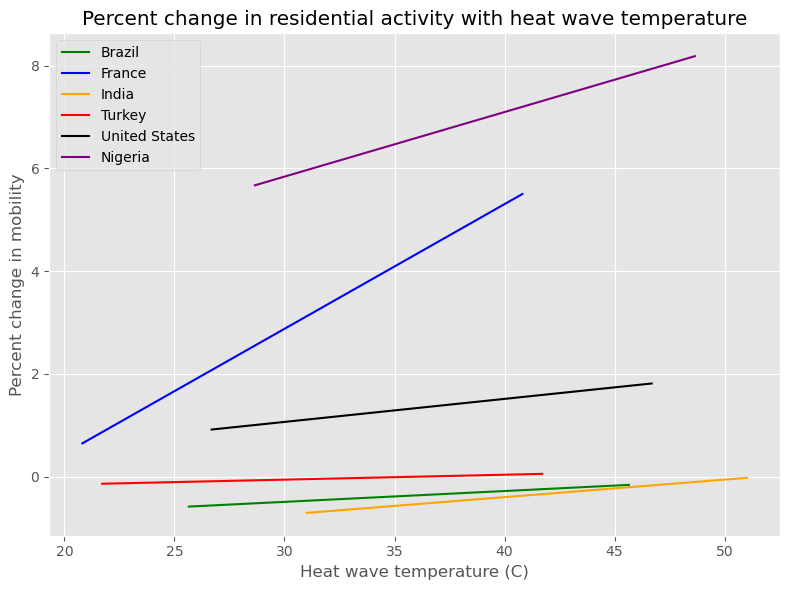

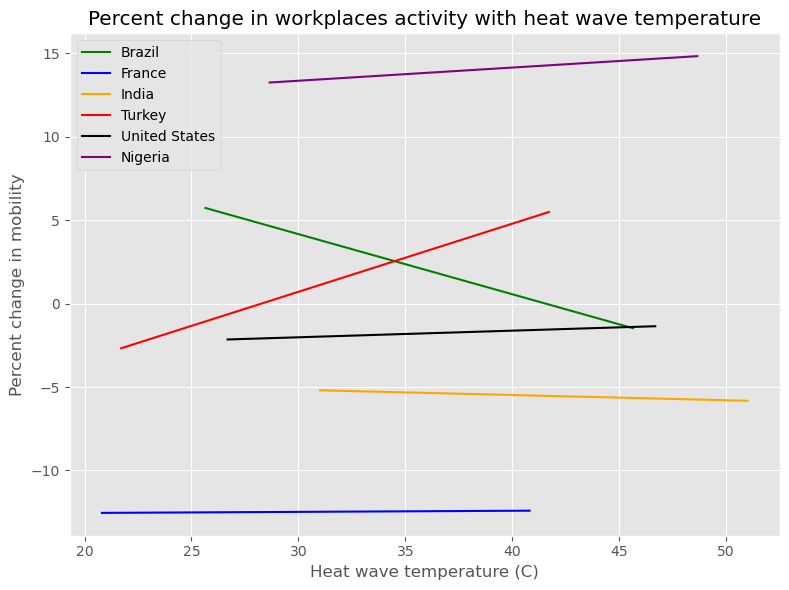

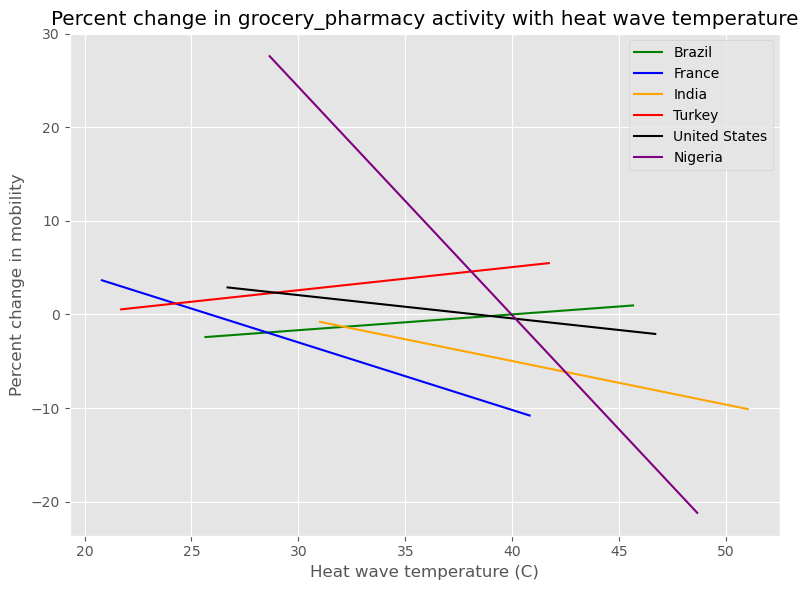

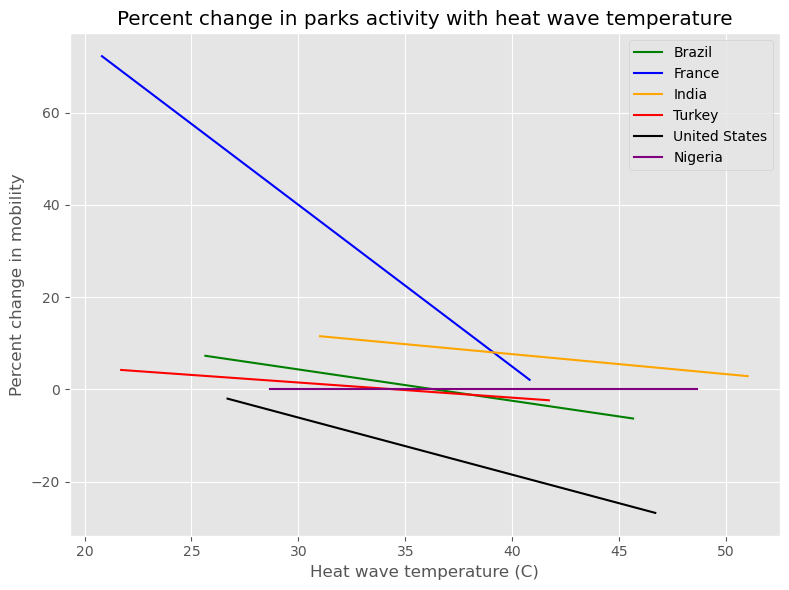

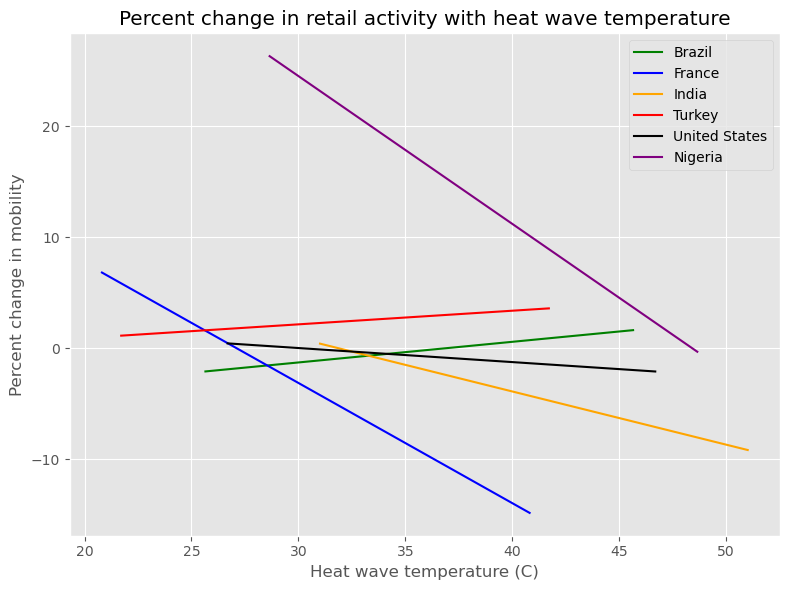

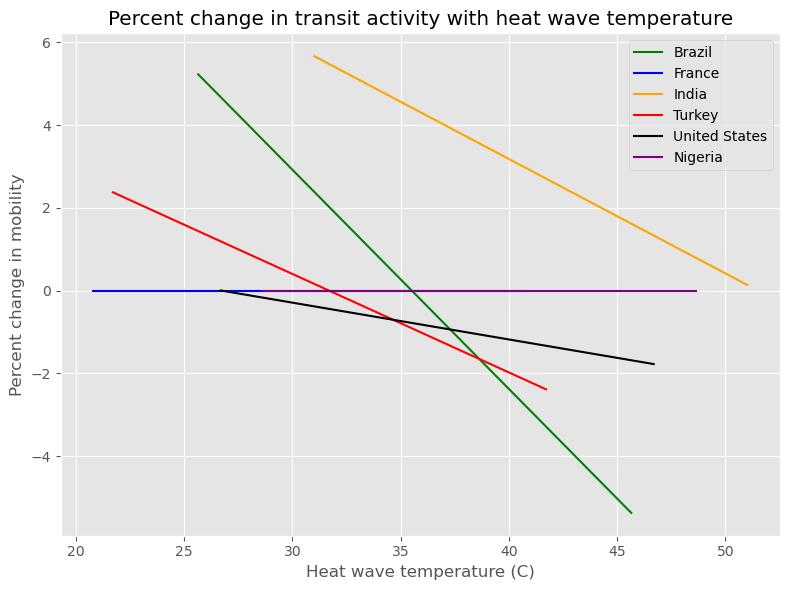

In [57]:
plot_regression('residential', params_dic)
plot_regression('workplaces', params_dic)
plot_regression('grocery_pharmacy', params_dic)
plot_regression('parks', params_dic)
plot_regression('retail', params_dic)
plot_regression('transit', params_dic)


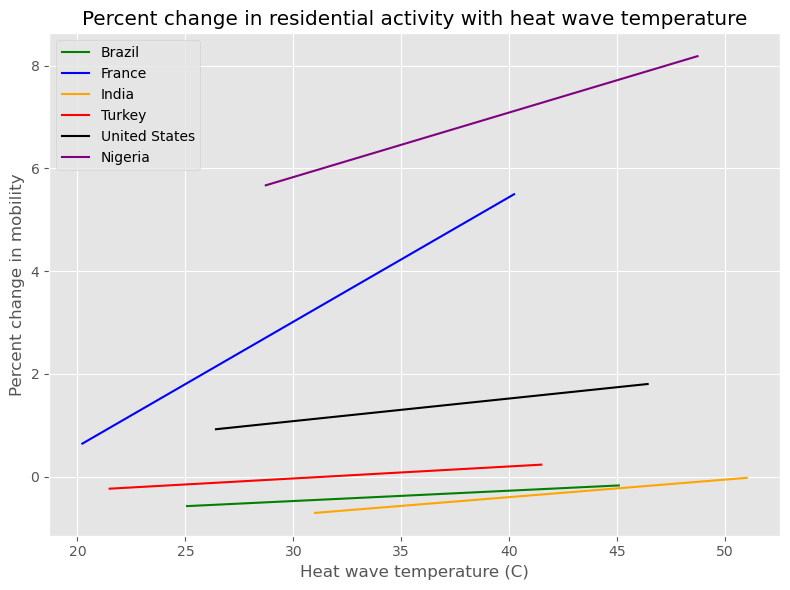

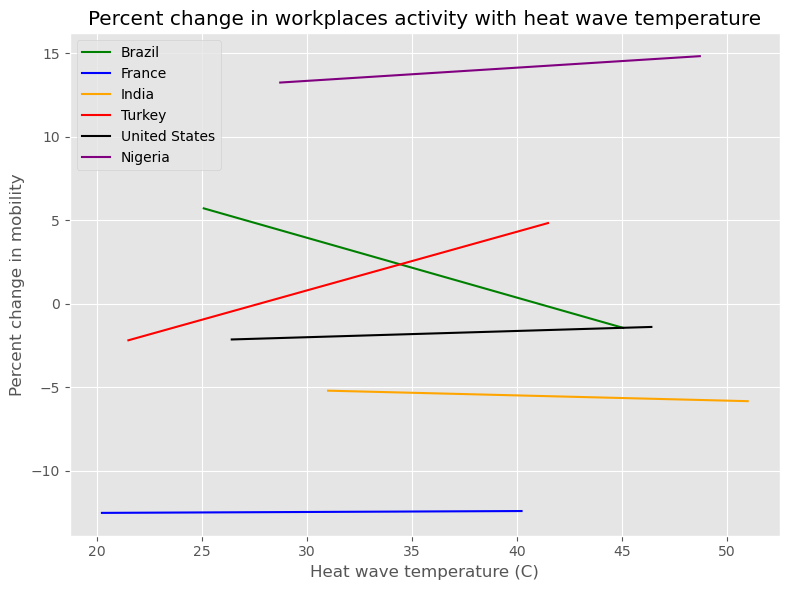

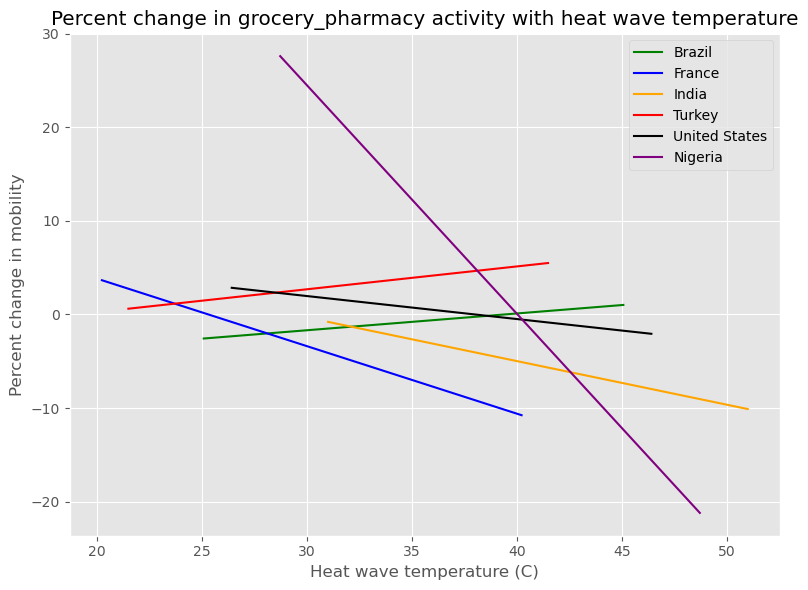

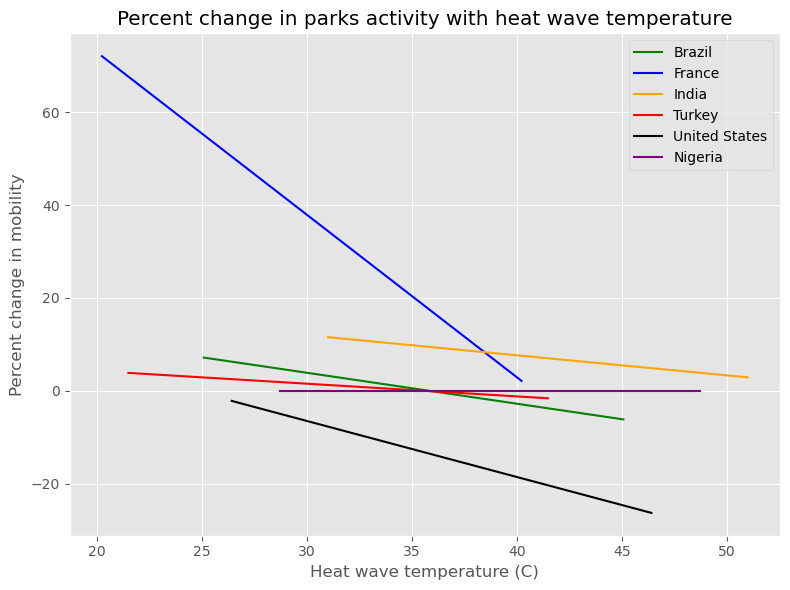

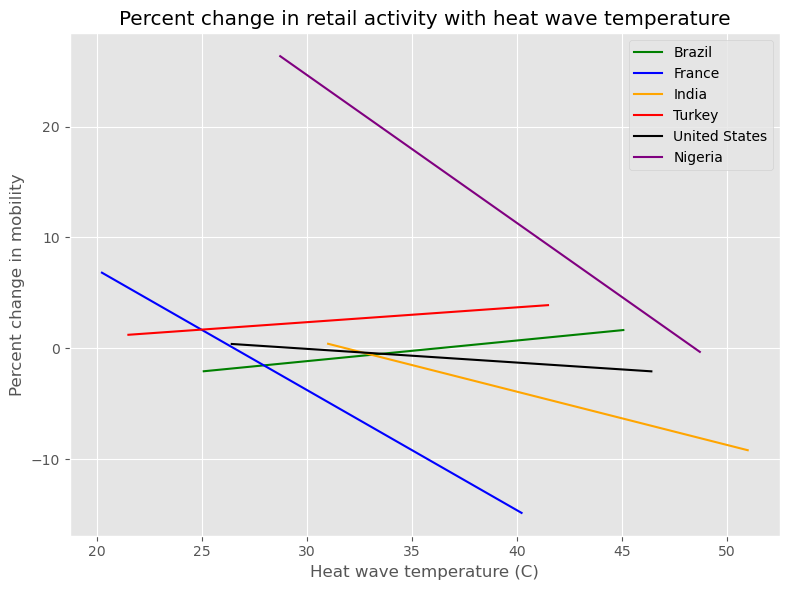

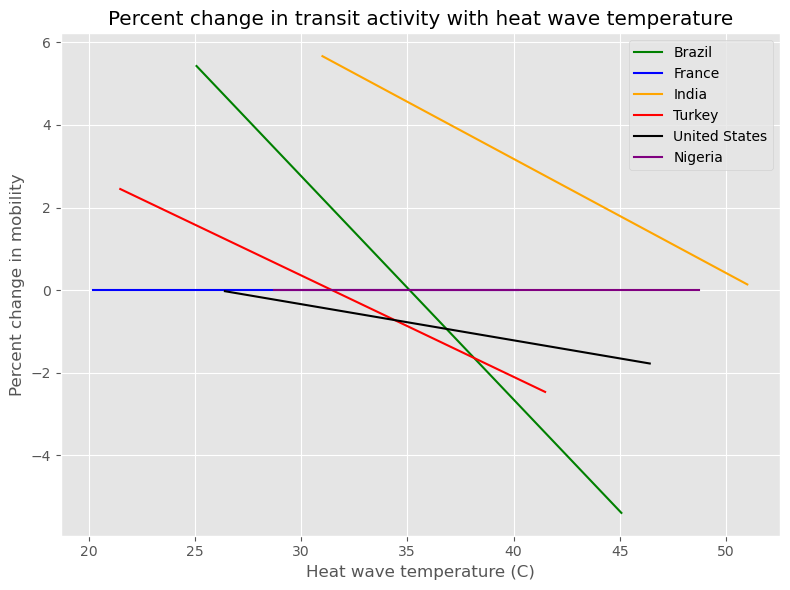

In [90]:
plot_regression('residential', params_dic)
plot_regression('workplaces', params_dic)
plot_regression('grocery_pharmacy', params_dic)
plot_regression('parks', params_dic)
plot_regression('retail', params_dic)
plot_regression('transit', params_dic)


### Create function which gathers average effects for each state into a dataframe

In [58]:
response

'retail'

In [59]:
params_dic[response]['Nigeria']

[np.float64(-1.33317530993059), np.float64(13.011776878867899)]

In [60]:
master = pd.DataFrame()
for response in ['residential', 'workplaces', 'transit', 'grocery_pharmacy', 'retail', 'parks']:
    
    br_line = np.poly1d(params_dic[response]['Brazil'])
    fr_line = np.poly1d(params_dic[response]['France'])
    in_line = np.poly1d(params_dic[response]['India'])
    tu_line = np.poly1d(params_dic[response]['Turkey'])
    us_line = np.poly1d(params_dic[response]['United States'])
    ng_line = np.poly1d(params_dic[response]['Nigeria'])


    x_axis = np.linspace(-10,10,20)


    
    
    br_x_axis = np.linspace(brazil['thi_heat'].min(),brazil['thi_heat'].max(),20)
    br_y_axis = br_line(x_axis)
    
    fr_x_axis = np.linspace(france['thi_heat'].min(),france['thi_heat'].max(),20)
    fr_y_axis = fr_line(x_axis)
    
    in_x_axis = np.linspace(india['thi_heat'].min(),india['thi_heat'].max(),20)
    in_y_axis = in_line(x_axis)
    
    tu_x_axis = np.linspace(turkey['thi_heat'].min(),turkey['thi_heat'].max(),20)
    tu_y_axis = tu_line(x_axis)

    us_x_axis = np.linspace(united_states['thi_heat'].min(),united_states['thi_heat'].max(),20)
    us_y_axis = us_line(x_axis)
    
    ng_x_axis = np.linspace(nigeria['thi_heat'].min(),nigeria['thi_heat'].max(),20)
    ng_y_axis = ng_line(x_axis)


    
    br = pd.DataFrame(br_x_axis, br_y_axis)
    fr = pd.DataFrame(fr_x_axis, fr_y_axis) 
    ind = pd.DataFrame(in_x_axis, in_y_axis)
    tu = pd.DataFrame(tu_x_axis, tu_y_axis)
    us = pd.DataFrame(us_x_axis, us_y_axis)
    ng = pd.DataFrame(ng_x_axis, ng_y_axis)


    br['state'] = 'Brazil'
    fr['state'] = 'France'
    ind['state'] = 'India'
    tu['state'] = 'Turkey'
    us['state'] = 'United States'
    ng['state'] = 'Nigeria'



    br.reset_index(inplace=True)
    fr.reset_index(inplace=True)
    ind.reset_index(inplace=True)
    tu.reset_index(inplace=True)
    us.reset_index(inplace=True)
    ng.reset_index(inplace=True)



    df = pd.concat([br, fr, ind, tu, us, ng])
    df['response'] = response
    
    master = pd.concat([master, df])

In [61]:
master.columns = ['change', 'temp', 'adm0', 'response']

In [62]:
master[master['change'] == 0]

,change,temp,adm0,response
0,0.0,22.077067,France,transit
1,0.0,23.040462,France,transit
2,0.0,24.003857,France,transit
3,0.0,24.967253,France,transit
4,0.0,25.930648,France,transit
5,0.0,26.894043,France,transit
6,0.0,27.857438,France,transit
7,0.0,28.820833,France,transit
8,0.0,29.784228,France,transit
9,0.0,30.747624,France,transit


In [63]:

master = master[(master['adm0'] != 'Nigeria') | (master['response'] != 'parks')]
master = master[(master['adm0'] != 'Nigeria') | (master['response'] != 'transit')]
master = master[(master['adm0'] != 'France') | (master['response'] != 'transit')]

In [64]:
master

,change,temp,adm0,response
0,-0.580236,26.965857,Brazil,residential
1,-0.558036,27.820934,Brazil,residential
2,-0.535835,28.676012,Brazil,residential
3,-0.513635,29.531089,Brazil,residential
4,-0.491434,30.386167,Brazil,residential
...,...,...,...,...
15,-21.544025,39.997246,United States,parks
16,-22.846867,41.173541,United States,parks
17,-24.149708,42.349836,United States,parks
18,-25.452550,43.526131,United States,parks


In [65]:
#save dataframe to re-create plots in R
master.to_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/results/THI_state_plots_precip_sorted_g2.csv')

In [67]:
master = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/results/THI_state_plots_precip_sorted_g2.csv')

In [68]:
dic = {}
dic['Brazil'] = {}
dic['Brazil']['residential'] = 0.20902
dic['Brazil']['workplaces'] = 0.93590
dic['Brazil']['transit'] = 2.56636
dic['Brazil']['grocery_pharmacy'] = 1.85287
dic['Brazil']['retail'] = 1.51537
dic['Brazil']['parks'] = 3.12036

dic['United States'] = {}
dic['United States']['residential'] = 0.10286
dic['United States']['workplaces'] = 0.19726
dic['United States']['transit'] = 0.74026
dic['United States']['grocery_pharmacy'] = 0.37981
dic['United States']['retail'] = 0.36330
dic['United States']['parks'] = 2.94141


dic['France'] = {}
dic['France']['residential'] = 0.67498
dic['France']['workplaces'] = 2.32014
dic['France']['grocery_pharmacy'] = 4.22185
dic['France']['retail'] = 4.01704
dic['France']['parks'] = 19.56905


dic['Nigeria'] = {}
dic['Nigeria']['residential'] = 1.35842
dic['Nigeria']['workplaces'] = 3.01627
dic['Nigeria']['grocery_pharmacy'] = 6.47780
dic['Nigeria']['retail'] = 7.13482


dic['Turkey'] = {}
dic['Turkey']['residential'] = 0.43400
dic['Turkey']['workplaces'] = 1.62225
dic['Turkey']['transit'] = 4.47545
dic['Turkey']['grocery_pharmacy'] = 3.01548
dic['Turkey']['retail'] = 2.65174
dic['Turkey']['parks'] = 5.66050

dic['India'] = {}
dic['India']['residential'] = 0.19659
dic['India']['workplaces'] = 1.06481
dic['India']['transit'] = 1.24175
dic['India']['grocery_pharmacy'] = 1.86029
dic['India']['retail'] = 1.23969
dic['India']['parks'] = 2.08440


In [69]:
se_df = pd.DataFrame(dic).unstack().reset_index()

In [70]:
se_df.columns = ['adm0', 'response', 'SE']

In [71]:
se_df = se_df[(se_df['adm0'] != 'Nigeria') | (se_df['response'] != 'parks')]
se_df = se_df[(se_df['adm0'] != 'Nigeria') | (se_df['response'] != 'transit')]
se_df = se_df[(se_df['adm0'] != 'France') | (se_df['response'] != 'transit')]

In [72]:
master = master.merge(se_df, on=['adm0', 'response'], how='left')

In [73]:
master.head()

,Unnamed: 0,change,temp,adm0,response,SE
0,0,-0.580236,26.965857,Brazil,residential,0.20902
1,1,-0.558036,27.820934,Brazil,residential,0.20902
2,2,-0.535835,28.676012,Brazil,residential,0.20902
3,3,-0.513635,29.531089,Brazil,residential,0.20902
4,4,-0.491434,30.386167,Brazil,residential,0.20902


In [74]:
master['lower_ci'] = master['change'] - (master['SE'] * 1.96)
master['upper_ci'] = master['change'] + (master['SE'] * 1.96)

In [76]:
master.to_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/paper2/results/THI_state_plots_CI_sorted_g2.csv')

In [109]:
master[(master['adm0'] == 'Nigeria') & (master['response'] == 'retail')]

,Unnamed: 0,change,temp,adm0,response,SE,lower_ci,upper_ci
540,0,26.343530,30.836104,Nigeria,retail,7.13482,12.359283,40.327777
541,1,24.940188,31.389163,Nigeria,retail,7.13482,10.955940,38.924435
542,2,23.536845,31.942222,Nigeria,retail,7.13482,9.552598,37.521092
543,3,22.133503,32.495280,Nigeria,retail,7.13482,8.149255,36.117750
544,4,20.730160,33.048339,Nigeria,retail,7.13482,6.745913,34.714407
545,5,19.326818,33.601398,Nigeria,retail,7.13482,5.342571,33.311065
546,6,17.923475,34.154457,Nigeria,retail,7.13482,3.939228,31.907723
547,7,16.520133,34.707515,Nigeria,retail,7.13482,2.535886,30.504380
548,8,15.116791,35.260574,Nigeria,retail,7.13482,1.132543,29.101038
549,9,13.713448,35.813633,Nigeria,retail,7.13482,-0.270799,27.697695
